In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
bank_df= pd.read_csv(r'C:\Users\user\Downloads\bank_marketing_part1_Data.csv')

In [3]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank_df.shape

(210, 7)

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
bank_df.describe() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [9]:
bank_df.duplicated().sum()

0

In [11]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [12]:
bank_df.isnull().sum().sum()

0

In [13]:
#importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [14]:
#Creating an object for the StandardScaler function
X = StandardScaler()

In [21]:
scaled_df = pd.DataFrame(X.fit_transform(bank_df),columns=bank_df.columns[0:])

In [112]:
scaled_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,3
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1
5,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.170590,-0.832274,3
6,-0.974080,-0.943539,-0.878059,-0.630155,-1.190520,0.380540,-0.204099,2
7,-0.381541,-0.390903,0.144293,-0.331518,-0.383756,-0.512143,-1.189192,2
8,1.144591,1.305384,-0.309615,1.453520,0.672468,-0.564811,1.764048,1
9,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156,2


In [23]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [113]:
#choosing average link method
link_method = linkage(scaled_df, method = 'average')

In [27]:
labelList = np.array(scaled_df.spending)
labelList

array([ 1.75435461,  0.39358228,  1.41330028, -1.38403424,  1.08258093,
       -0.7398205 , -0.97408004, -0.3815412 ,  1.1445908 , -1.24623451,
        1.27550055, -0.26096644, -0.92929513,  1.42363526, -0.9465201 ,
       -0.70881556,  0.44525718, -1.39436922, -0.56068085, -0.7398205 ,
       -0.85350528, -0.61235575,  1.07913593, -0.76738045,  0.09042287,
        0.24544757, -0.71226056, -1.31857937, -1.20489459, -1.24623451,
       -0.36776123, -1.03608992, -0.7914954 ,  0.35568735, -1.04297991,
       -1.26001448, -1.27723945, -0.90518018, -1.0464249 ,  1.6062199 ,
        1.33406543, -0.34709127,  0.69674168,  1.78535955, -1.39781421,
       -1.26345948, -0.58135081,  1.4511952 ,  1.41674527,  1.37196036,
       -0.72948552,  1.33406543,  1.58899493,  1.56143499,  1.36507037,
        0.47626211, -0.85006029, -1.03953492, -1.34958431,  1.30995048,
       -0.01981691, -1.18422463, -1.23245454,  0.14209777, -0.17484161,
        1.37885035,  2.01961909, -0.25407645,  1.48220014, -0.91

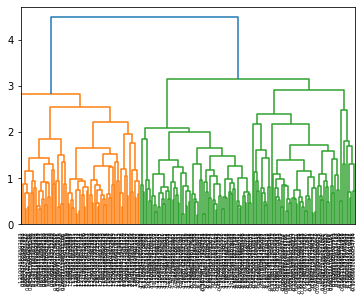

<Figure size 3600x720 with 0 Axes>

In [32]:
dend = dendrogram(link_method,labels = labelList)


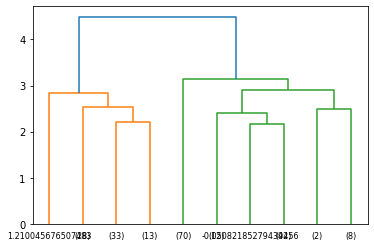

In [111]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                  leaf_font_size = 8,
                 labels = labelList 
                 )



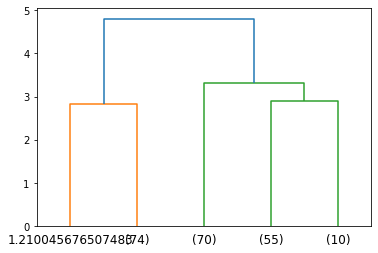

In [114]:
dend = dendrogram(link_method, truncate_mode='lastp',p=5,labels=labelList)

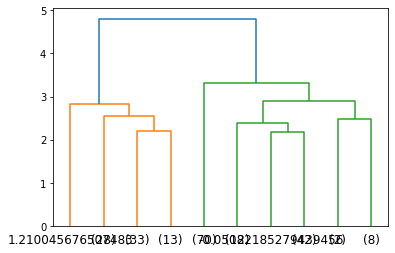

In [115]:
dend = dendrogram(link_method, truncate_mode='lastp',p=10,labels=labelList)

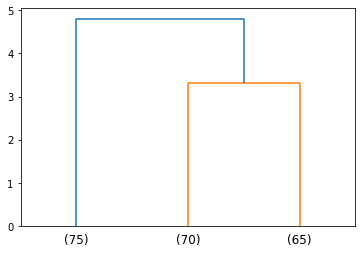

In [117]:
dend = dendrogram(link_method, truncate_mode='lastp',p=3,labels=labelList)

In [34]:
from scipy.cluster.hierarchy import fcluster

In [35]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [120]:
bank_df['clusters'] = clusters

In [128]:
#We have performed the cluster analysis on scaled data itself but I'm showing the clusters in the original data for better understading
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [129]:
bank_df[bank_df['clusters']==1]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1
...,...,...,...,...,...,...,...,...
196,18.76,16.20,0.8984,6.172,3.796,3.120,6.053,1
198,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,1
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,1
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1


In [130]:
scaled_df.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [137]:
#cluster profiles

aggdata=bank_df.groupby('clusters').mean()
aggdata['Freq']=bank_df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [46]:
# Creating Clusters using KMeans

### Forming 2 Clusters with K=3

In [47]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 3,random_state=1)

In [48]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=3, random_state=1)

In [49]:
### Cluster Output for all the observations

In [50]:
# Get the labels
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1,
       1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1])

In [51]:
k_means.inertia_

452.93075285004505

In [52]:
### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [53]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1609.52380952381

In [54]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

452.93075285004505

In [55]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

385.7145482278047

In [56]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

340.54727252280634

In [57]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

302.7506387237606

In [61]:
#WSS reduces as K keeps increasing


In [62]:
### Calculating WSS for other values of K - Elbow Method
wss =[] 

In [63]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [64]:
wss

[1609.52380952381,
 716.1472971314729,
 452.93075285004505,
 385.7145482278047,
 340.54727252280634,
 302.7506387237606,
 275.6290908477157,
 247.99384365763126,
 230.28424558472162,
 214.0667367452935]

In [65]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

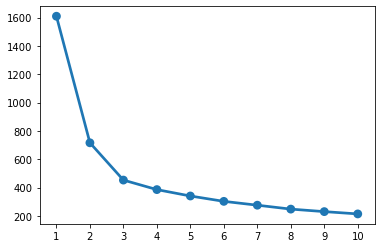

In [66]:
sns.pointplot(a, wss)

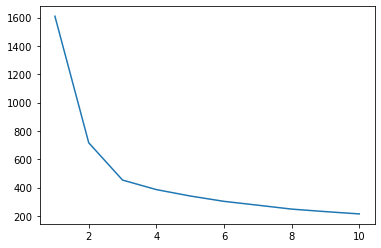

In [67]:
plt.plot(range(1,11), wss)

In [89]:
# KMeans with K=3
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
label = k_means.labels_

In [69]:
### Cluster evaluation for 3 clusters: the silhouette score

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [90]:
# Calculating silhouette_score
silhouette_score(scaled_df,label,random_state=1)

0.44480502951323636

In [73]:
# KMeans with K=4
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [74]:
### Cluster evaluation for 4 clusters
silhouette_score(scaled_df,labels,random_state=1)

0.38384390736058027

In [139]:
# KMeans with K=5
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [140]:
### Cluster evaluation for 5 clusters
silhouette_score(scaled_df,labels,random_state=1)

0.32299845272226696

In [75]:
##### silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

In [76]:
#Appending Clusters to the original dataset

In [138]:
bank_df["Clus_kmeans3"] = label
bank_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3,0
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,0
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2,2
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,0


In [95]:
# Cluster Profiling

In [96]:
bank_df.Clus_kmeans3.value_counts().sort_index()

0    75
1    71
2    64
Name: Clus_kmeans3, dtype: int64

In [148]:
clust_profile=bank_df
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=bank_df.Clus_kmeans3.value_counts().sort_index()
clust_profile.head(10).T

Clus_kmeans3,0,1,2
spending,11.966133,18.314930,14.377500
advance_payments,13.309467,16.134366,14.276562
probability_of_full_payment,0.847891,0.882689,0.885109
current_balance,5.258160,6.158845,5.474250
credit_limit,2.860107,3.671789,3.267219
min_payment_amt,4.690053,3.630620,2.617409
max_spent_in_single_shopping,5.109240,6.025225,5.073609
clusters,2.040000,1.000000,2.906250
freq,75.000000,71.000000,64.000000


In [149]:
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,freq
Clus_kmeans3,,,,,,,,,
0,11.966133,13.309467,0.847891,5.258160,2.860107,4.690053,5.109240,2.04000,75
1,18.314930,16.134366,0.882689,6.158845,3.671789,3.630620,6.025225,1.00000,71
2,14.377500,14.276562,0.885109,5.474250,3.267219,2.617409,5.073609,2.90625,64
